In [1]:
#importo librerias

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


# Preprocesado, modelado y métricas:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline


        

In [2]:
#Genero una matriz uniforme de 20 datos pero lo hago en dos partes para poder seàrar mejor los datos.
XU_train1=np.random.uniform(0,1,10)
XU_train2=np.random.uniform(1.5,2,10)
XU=np.append(XU_train1, XU_train2, axis=0)
XU


array([0.07750218, 0.39837709, 0.92383015, 0.8726103 , 0.99336075,
       0.07790608, 0.03143689, 0.95918235, 0.69650797, 0.91271337,
       1.61009628, 1.87682843, 1.77879432, 1.8968616 , 1.62268996,
       1.95835926, 1.81197725, 1.92554836, 1.5707791 , 1.73778433])

In [3]:
#Genero una matriz normal de 20 datos pero lo hago en dos partes para poder seàrar mejor los datos.
XN_train1=np.random.normal(0,1,10)
XN_train2 = np.random.normal(1.5,2,10)
XN=np.concatenate((XN_train1,XN_train2), axis=0)
XN

array([-0.06986492, -0.59078734,  0.14601851,  2.72299382, -0.088016  ,
        2.28502678,  0.85046831, -0.11160227,  0.37393894,  2.38978779,
        3.23598372,  2.48403188, -1.49864724, -0.18288735,  2.71783196,
        0.57462425,  2.65084519,  1.93635716,  0.30902668,  1.17204077])

In [4]:
#Genero una matriz sesgada de 20 datos pero lo hago en dos partes para poder seàrar mejor los datos.

XS_train1=np.random.lognormal(0,1,10)
XS_train2 = np.random.lognormal(10,15,10)
XS=np.concatenate((XS_train1, XS_train2), axis=0)
XS


array([1.48219314e+00, 7.24228079e-01, 3.19201264e+00, 1.59015070e+00,
       6.42690765e-01, 1.32525297e+00, 8.63918584e-01, 9.33228529e-01,
       6.35551014e-01, 1.51090334e+00, 1.73441962e-01, 2.26436589e+07,
       1.49082763e+11, 1.15968225e+00, 7.00644933e+07, 6.23331648e+06,
       2.69563209e-04, 5.70937379e+11, 2.02524126e-03, 5.72306499e+01])

In [5]:
#hago una matriz contres columnas donde una columna es la matriz uniforme XS otra la matriz normal XN y otra la matriz sesgada XS

X=np.append([XU],[XN],axis=0)
X=np.append(X,[XS], axis=0)
X


#X= np.append(XU , XN , axis=1)
#X= np.append(X, XS , axis=1)
#X




#X= np.concatenate(([XU],[XN]),axis=1)
#X= np.concatenate((X,[XS]),axis=1)
#X

array([[ 7.75021779e-02,  3.98377085e-01,  9.23830151e-01,
         8.72610301e-01,  9.93360750e-01,  7.79060809e-02,
         3.14368853e-02,  9.59182354e-01,  6.96507971e-01,
         9.12713371e-01,  1.61009628e+00,  1.87682843e+00,
         1.77879432e+00,  1.89686160e+00,  1.62268996e+00,
         1.95835926e+00,  1.81197725e+00,  1.92554836e+00,
         1.57077910e+00,  1.73778433e+00],
       [-6.98649249e-02, -5.90787335e-01,  1.46018506e-01,
         2.72299382e+00, -8.80160043e-02,  2.28502678e+00,
         8.50468313e-01, -1.11602266e-01,  3.73938936e-01,
         2.38978779e+00,  3.23598372e+00,  2.48403188e+00,
        -1.49864724e+00, -1.82887349e-01,  2.71783196e+00,
         5.74624247e-01,  2.65084519e+00,  1.93635716e+00,
         3.09026677e-01,  1.17204077e+00],
       [ 1.48219314e+00,  7.24228079e-01,  3.19201264e+00,
         1.59015070e+00,  6.42690765e-01,  1.32525297e+00,
         8.63918584e-01,  9.33228529e-01,  6.35551014e-01,
         1.51090334e+00,  1.7

In [6]:
X.shape

(3, 20)

In [7]:
#X_train.transpose().shape

In [8]:
#print(X_train.transpose())


In [9]:
#df=pd.DataFrame(X_train.transpose())
#df

In [10]:
df = pd.DataFrame(list(zip(XN,XU,XS)))
df

,0,1,2
0,-0.069865,0.077502,1.482193e+00
1,-0.590787,0.398377,7.242281e-01
2,0.146019,0.923830,3.192013e+00
3,2.722994,0.872610,1.590151e+00
4,-0.088016,0.993361,6.426908e-01
5,2.285027,0.077906,1.325253e+00
6,0.850468,0.031437,8.639186e-01
7,-0.111602,0.959182,9.332285e-01
8,0.373939,0.696508,6.355510e-01
9,2.389788,0.912713,1.510903e+00


In [11]:
X_np = df.to_numpy()
X_np

array([[-6.98649249e-02,  7.75021779e-02,  1.48219314e+00],
       [-5.90787335e-01,  3.98377085e-01,  7.24228079e-01],
       [ 1.46018506e-01,  9.23830151e-01,  3.19201264e+00],
       [ 2.72299382e+00,  8.72610301e-01,  1.59015070e+00],
       [-8.80160043e-02,  9.93360750e-01,  6.42690765e-01],
       [ 2.28502678e+00,  7.79060809e-02,  1.32525297e+00],
       [ 8.50468313e-01,  3.14368853e-02,  8.63918584e-01],
       [-1.11602266e-01,  9.59182354e-01,  9.33228529e-01],
       [ 3.73938936e-01,  6.96507971e-01,  6.35551014e-01],
       [ 2.38978779e+00,  9.12713371e-01,  1.51090334e+00],
       [ 3.23598372e+00,  1.61009628e+00,  1.73441962e-01],
       [ 2.48403188e+00,  1.87682843e+00,  2.26436589e+07],
       [-1.49864724e+00,  1.77879432e+00,  1.49082763e+11],
       [-1.82887349e-01,  1.89686160e+00,  1.15968225e+00],
       [ 2.71783196e+00,  1.62268996e+00,  7.00644933e+07],
       [ 5.74624247e-01,  1.95835926e+00,  6.23331648e+06],
       [ 2.65084519e+00,  1.81197725e+00

In [12]:
y_np =np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
y_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
y.shape

NameError: name 'y' is not defined

In [14]:
print("La media de la distribucion normal es", np.mean(XN))

La media de la distribucion normal es 1.0653585316588021


In [15]:
print("La varianza de la distribucion normal es", np.var(XN))

La varianza de la distribucion normal es 1.7894874716264204


Text(0, 0.5, 'Dist. Sesgada')

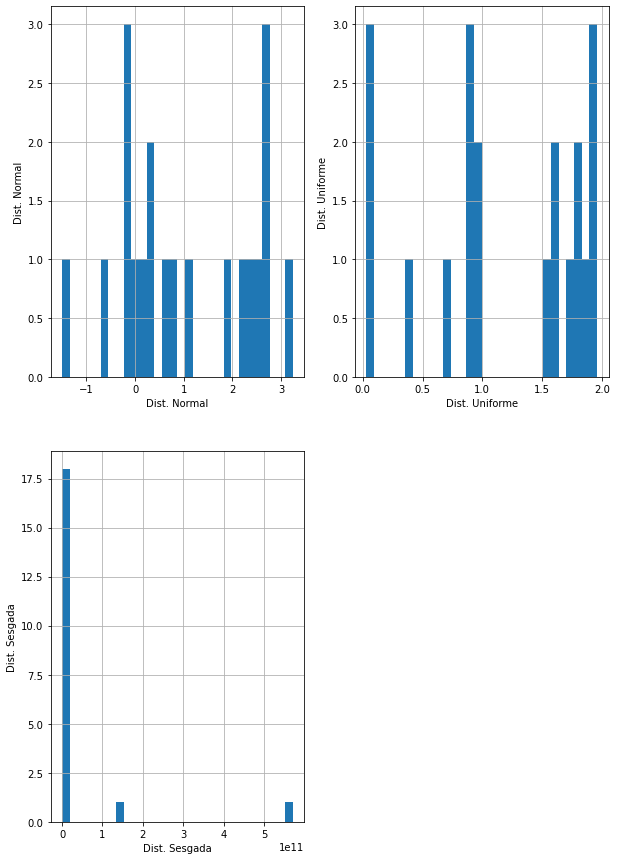

In [16]:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')

In [17]:
# Separo en grupos de entrenamiento y testeo. Asigno un tamaño de 80% para entrenamiento y 20% para 
# testeo:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_np,y_np,test_size=0.2)

In [18]:
print('X_train:',len(X_train))
print('X_test:  ',len(X_test))
print('y_train:',len(y_train))
print('y_test:  ',len(y_test))

X_train: 16
X_test:   4
y_train: 16
y_test:   4


In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_predicha = model.predict(X_test)
y_predicha

array([0, 1, 0, 0])

In [25]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_predicha)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[2 0]
 [1 1]]


<AxesSubplot:>

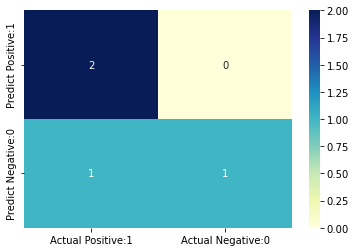

In [26]:
matrix = pd.DataFrame(data=matriz, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

El grafico anterior indica lo siguiente:
- En el espacio superior izquierdo: Aquí estan los datos que siendo 1 fueron clasificados como 1
- En el espacio superior derecho: Los datos que siendo 0 fueron clasificados como 1 (Error de tipo I)
- En el espacio inferior izquierdo: Los datos que siendo 0 fueron clasificados como 1 (Error de tipo II)
- En el espacio inferior derecho: Los datos que siendo 0 fueron clasificados como 0 
